![Rhyme](https://rhyme.com/assets/img/logo-dark.png)

# Task 1: Introduction

Welcome to Basic Image Classification with TensorFlow.



### Import TensorFlow

In [ ]:
import tensorflow as tf

#tf.logging.set_verbosity(tf.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.19.0


# Task 2: The Dataset
### Import MNIST

In [ ]:
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


### Shapes of Imported Arrays

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


### Plot an Image Example

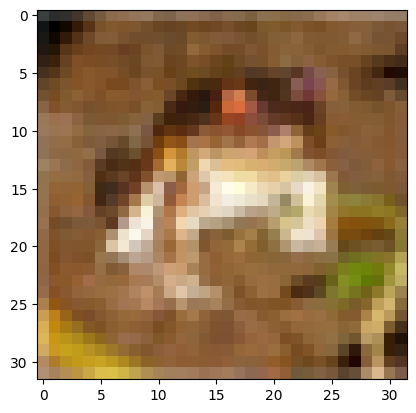

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0])

### Display Labels

In [ ]:
print(y_train[0])

[6]


In [ ]:
print(set(tuple(label) for label in y_train))


{(np.uint8(6),), (np.uint8(2),), (np.uint8(5),), (np.uint8(8),), (np.uint8(4),), (np.uint8(1),), (np.uint8(7),), (np.uint8(0),), (np.uint8(3),), (np.uint8(9),)}


# Task 3: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Validated Shapes

In [ ]:
print(y_train_encoded.shape)

(50000, 10)


### Display Encoded Labels

In [ ]:
print(y_train_encoded[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# Task 4: Neural Networks

### Linear Equations

![Single Neuron](images/1_2.png)

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

![Single Neuron with 784 features](images/1_3.png)

### Neural Networks

![Neural Network with 2 hidden layers](images/1_4.png)

This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

# Task 5: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [ ]:
import numpy as np

x_train_reshaped = np.reshape(x_train,(50000,3072))
x_test_reshaped = np.reshape(x_test,(10000,3072))

print(x_test_reshaped.shape)

(10000, 3072)


### Display Pixel Values

In [ ]:
print(x_train_reshaped[0])

[ 59  62  63 ... 123  92  72]


### Data Normalization

In [ ]:
x_mean=np.mean(x_train_reshaped)
x_std=np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped-x_mean)/(x_std+epsilon)
x_test_norm = (x_test_reshaped-x_mean)/(x_std+epsilon)

In [ ]:
x_mean_cnn = np.mean(x_train, axis=(0,1,2), keepdims=True)
x_std_cnn  = np.std(x_train, axis=(0,1,2), keepdims=True)

epsilon = 1e-7

x_train_norm_cnn = (x_train - x_mean_cnn) / (x_std_cnn + epsilon)
x_test_norm_cnn  = (x_test  - x_mean_cnn) / (x_std_cnn + epsilon)

### Display Normalized Pixel Values

In [ ]:
print(set(x_train_norm[0]))

{np.float64(-0.9619250525647831), np.float64(-0.899571268186059), np.float64(-0.7436868072392488), np.float64(0.28515063500969795), np.float64(-0.7125099150498868), np.float64(-0.6657445767658439), np.float64(-0.5098601158190337), np.float64(0.2539737428203359), np.float64(-0.8060405916179729), np.float64(0.6592733412820422), np.float64(1.3763418616373688), np.float64(-1.2736939744584033), np.float64(-1.7257589112041527), np.float64(1.3451649694480068), np.float64(1.7972299061937562), np.float64(-0.04220673297860333), np.float64(1.70369922962567), np.float64(1.2516342928799207), np.float64(-1.3672246510264894), np.float64(-1.8192895877722388), np.float64(-0.07338362516796536), np.float64(0.09808928187352578), np.float64(1.1581036163118346), np.float64(1.610168553057584), np.float64(0.30073908110437897), np.float64(-1.4607553275945755), np.float64(-1.008690390848826), np.float64(2.0622334898033334), np.float64(1.0645729397437484), np.float64(1.9687028132352473), np.float64(1.51663787648

# Task 6: Creating a Model
### Creating the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_mlp():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(3072,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

## Convolutional Neural Network (CNN)

Unlike the MLP baseline, this model preserves the 2D spatial structure of the image.
Convolutional layers learn local patterns such as strokes and curves, which are
crucial for image understanding.

This model is designed to compare how spatial inductive bias affects learning
and generalization on image data.


In [ ]:
def build_cnn():
    return tf.keras.Sequential([
        inputs = tf.keras.Input(shape=(32, 32, 3))
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
    ])


SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (ipython-input-3165182932.py, line 3)

In [ ]:
print(y_train_encoded[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](images/1_5.png)

### Compiling the Model

In [ ]:
def build_mlp():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(3072,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    return model


mlp_model = build_mlp()
mlp_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,146 (1.57 MB)

 Trainable params: 411,146 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def build_cnn():
    inputs = tf.keras.Input(shape=(32, 32, 3))

    x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D((2,2))(x)

    x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2,2))(x)

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    outputs = tf.keras.layers.Dense(10)(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    return model

cnn_model = build_cnn()


cnn_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()


In [ ]:
for w in cnn_model.weights:
    print(tf.reduce_mean(w))
    break

tf.Tensor(0.0055349763, shape=(), dtype=float32)


In [ ]:
for w in mlp_model.weights:
    print(tf.reduce_mean(w))
    break

tf.Tensor(-0.00010546303, shape=(), dtype=float32)


# Task 7: Training the Model

### Training the Model

In [ ]:
mlp_hist= mlp_model.fit(x_train_norm , y_train , epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3512 - loss: 1.9145
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4622 - loss: 1.5249
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4994 - loss: 1.4196
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5224 - loss: 1.3460
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5416 - loss: 1.2810
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5610 - loss: 1.2377
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5761 - loss: 1.1845
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5916 - loss: 1.1498
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6054 - loss: 1.1094
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6159 - loss: 1.0774


In [ ]:
cnn_history = cnn_model.fit(
    x_train_norm_cnn, y_train,
    epochs=10,
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4647 - loss: 1.4952
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6736 - loss: 0.9332
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7341 - loss: 0.7649
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7714 - loss: 0.6474
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8094 - loss: 0.5433
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8423 - loss: 0.4547
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8762 - loss: 0.3641
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8967 - loss: 0.2990
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9108 - loss: 0.2548
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9352 - loss: 0.1889


### Evaluating the Model

In [ ]:
mlp_loss , mlp_accuracy = mlp_model.evaluate(x_test_norm , y_test)
print(mlp_accuracy*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5145 - loss: 1.4343
51.5999972820282


In [ ]:
cnn_loss, cnn_acc = cnn_model.evaluate(x_test_norm_cnn, y_test)
print("CNN Test Accuracy:", cnn_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7167 - loss: 1.2431
CNN Test Accuracy: 0.7124000191688538


# Task 8: Predictions

### Predictions on Test Set

In [ ]:
preds = cnn_model.predict(x_test)
print("shape of preds" , preds.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
shape of preds (10000, 10)


### Plotting the Results

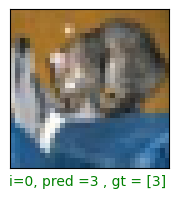

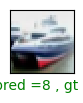

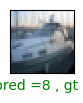

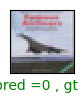

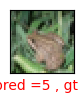

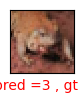

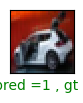

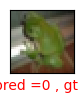

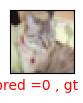

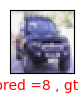

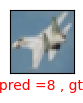

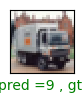

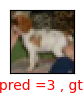

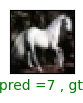

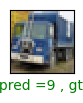

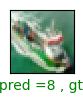

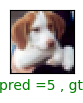

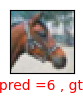

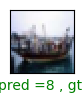

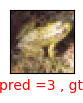

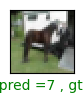

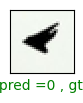

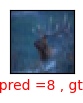

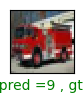

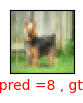

In [ ]:
plt.figure(figsize=(12,12))
start_index=0

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    pred = np.argmax(preds[start_index+i])
    gt = y_test[start_index+i]

    col ='g'
    if pred != gt:
        col ='r'

    plt.xlabel('i={}, pred ={} , gt = {} '.format(start_index+i,pred,gt),color=col)
    plt.imshow(x_test[start_index+i], cmap = 'binary')
    plt.show()

In [ ]:
plt.plot(preds[8])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

idx = 1  # try different indices later
sample_img = x_test[idx]
sample_label = y_test[idx]


(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

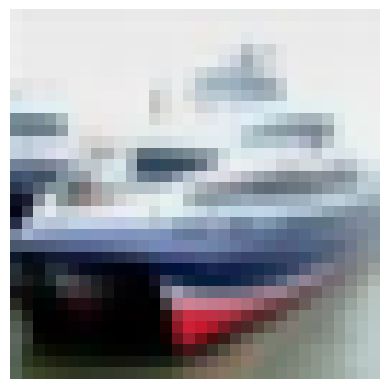

In [ ]:
plt.imshow(sample_img)
plt.axis("off")


In [ ]:
_ = cnn_model.predict(x_test_norm_cnn[:1])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [ ]:
layer_name = cnn_model.layers[2].name

feature_extractor = tf.keras.Model(
    inputs=cnn_model.input,
    outputs=cnn_model.get_layer(layer_name).output
)


In [ ]:
feature_maps = feature_extractor(np.expand_dims(sample_img, axis=0))


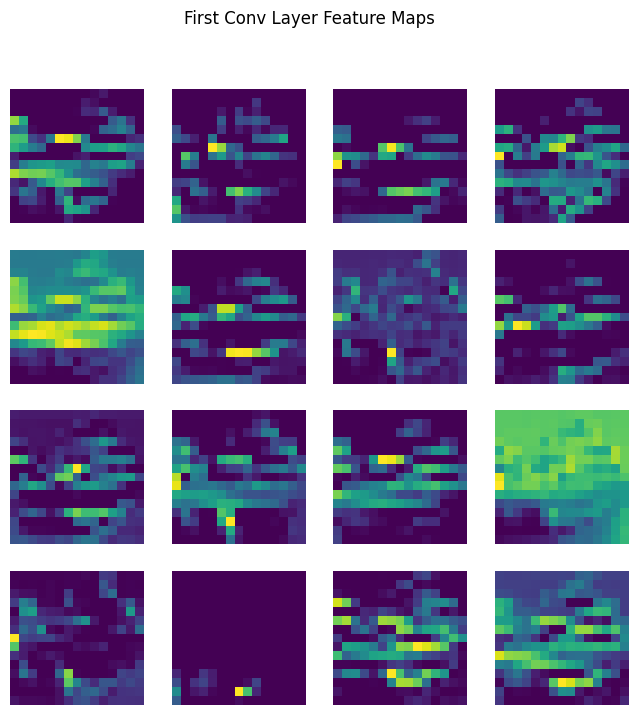

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(feature_maps[0, :, :, i], cmap="viridis")
    ax.axis("off")

plt.suptitle("First Conv Layer Feature Maps")
plt.show()


In [ ]:
for layer in cnn_model.layers:
    print(layer.name)


input_layer
conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
flatten
dense
dense_1


# GRAD-CAM

In [ ]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras

# Display
from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt


array([[[235, 235, 235],
        [231, 231, 231],
        [232, 232, 232],
        ...,
        [233, 233, 233],
        [233, 233, 233],
        [232, 232, 232]],

       [[238, 238, 238],
        [235, 235, 235],
        [235, 235, 235],
        ...,
        [236, 236, 236],
        [236, 236, 236],
        [235, 235, 235]],

       [[237, 237, 237],
        [234, 234, 234],
        [234, 234, 234],
        ...,
        [235, 235, 235],
        [235, 235, 235],
        [234, 234, 234]],

       ...,

       [[ 87,  99,  89],
        [ 43,  51,  37],
        [ 19,  23,  11],
        ...,
        [169, 184, 179],
        [182, 197, 193],
        [188, 202, 201]],

       [[ 82,  96,  82],
        [ 46,  57,  36],
        [ 36,  44,  22],
        ...,
        [174, 189, 183],
        [185, 200, 196],
        [187, 202, 200]],

       [[ 85, 101,  83],
        [ 62,  75,  48],
        [ 58,  67,  38],
        ...,
        [168, 183, 178],
        [180, 195, 191],
        [186, 200, 199]]], dtype=uint8)
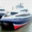

In [ ]:
model_builder = keras.applications.xception.Xception
img_size = (32,32)

last_conv_layer_name = "conv2d_1"

display(sample_img)


In [ ]:
img_array = sample_img[np.newaxis, ...]
model = cnn_model
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class: 8


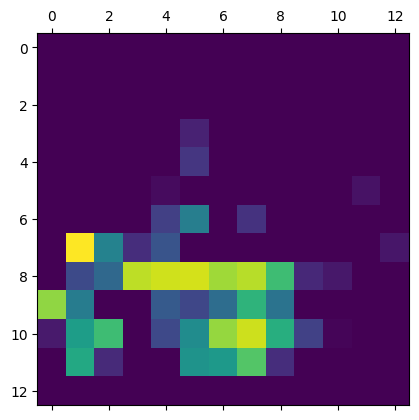

In [ ]:
img_array = sample_img[np.newaxis, ...]
model = cnn_model
# Print what the top predicted class is
preds = model.predict(img_array)
pred_class = np.argmax(preds[0])
print("Predicted class:", pred_class)
# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()


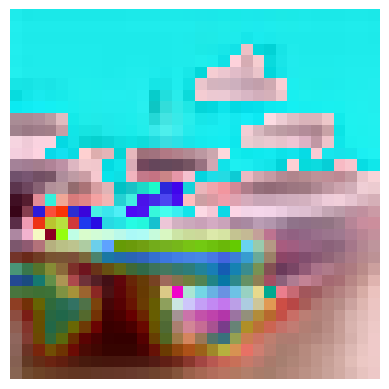

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def display_gradcam(img, heatmap, alpha=0.4):
    """
    img: original image array (32,32,3) in range [0,1] or [0,255]
    heatmap: Grad-CAM heatmap (H,W) normalized between 0 and 1
    """

    # Ensure image is in uint8
    if img.max() <= 1.0:
        img = np.uint8(img * 255)
    else:
        img = np.uint8(img)

    # Resize heatmap to image size
    heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # Convert heatmap to RGB
    heatmap_color = cv2.applyColorMap(
        np.uint8(255 * heatmap_resized),
        cv2.COLORMAP_JET
    )

    # Overlay
    superimposed_img = heatmap_color * alpha + img
    superimposed_img = np.uint8(superimposed_img)

    # Display
    plt.imshow(superimposed_img)
    plt.axis("off")
    plt.show()
display_gradcam(sample_img, heatmap)